In [253]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [30, 15]

In [187]:
df = pd.read_excel("C:\\Users\\ZM\\Desktop\\futures\\DCE Iron Ore Datas.xls", skiprows=[1], skipfooter=1)
df.dropna(how="all", inplace=True)
df.columns=["date", "price", "closing", "vol", "oi"]
df = df[(df['date'] >= '2018-1-1')]

In [229]:
df["price %chg"] = (df["price"].pct_change(1)*100).round(2)

df["vol %chg"] = (df["vol"].pct_change(1)*100).round(2)
df["vol sma"] = df["vol"].rolling(5).mean()
df["vol std"] = df["vol"].rolling(5).std().round(2)
df["vol std chg"] = (df["vol"] - df["vol"].rolling(10).mean()) / df["vol"].rolling(10).std()

df["oi %chg"] = (df["oi"].pct_change(1)*100).round(2)
df["oi sma"] = df["oi"].rolling(5).mean()

print(df.tail(10))

           date  price  closing        vol         oi  price %chg  vol %chg  \
1383 2019-06-19  800.0    806.5  3531560.0  1868552.0        4.23     51.87   
1384 2019-06-20  813.5    831.0  3106532.0  1945684.0        1.69    -12.04   
1385 2019-06-21  822.5    820.0  2717594.0  1883998.0        1.11    -12.52   
1386 2019-06-24  808.0    813.5  2953570.0  1757136.0       -1.76      8.68   
1387 2019-06-25  806.0    798.5  1829450.0  1659532.0       -0.25    -38.06   
1388 2019-06-26  795.5    804.0  2646276.0  1609492.0       -1.30     44.65   
1389 2019-06-27  821.5    821.5  3016596.0  1714706.0        3.27     13.99   
1390 2019-06-28  833.5    838.5  2351208.0  1774126.0        1.46    -22.06   
1391 2019-07-01  855.5    873.0  2142258.0  1778972.0        2.64     -8.89   
1392 2019-07-02  886.5    900.0  2766620.0  1719956.0        3.62     29.15   

      oi %chg    vol std  vol std chg    vol sma  vol mvg std     oi sma  
1383     3.45  639616.36     1.815044  2625074.0    639

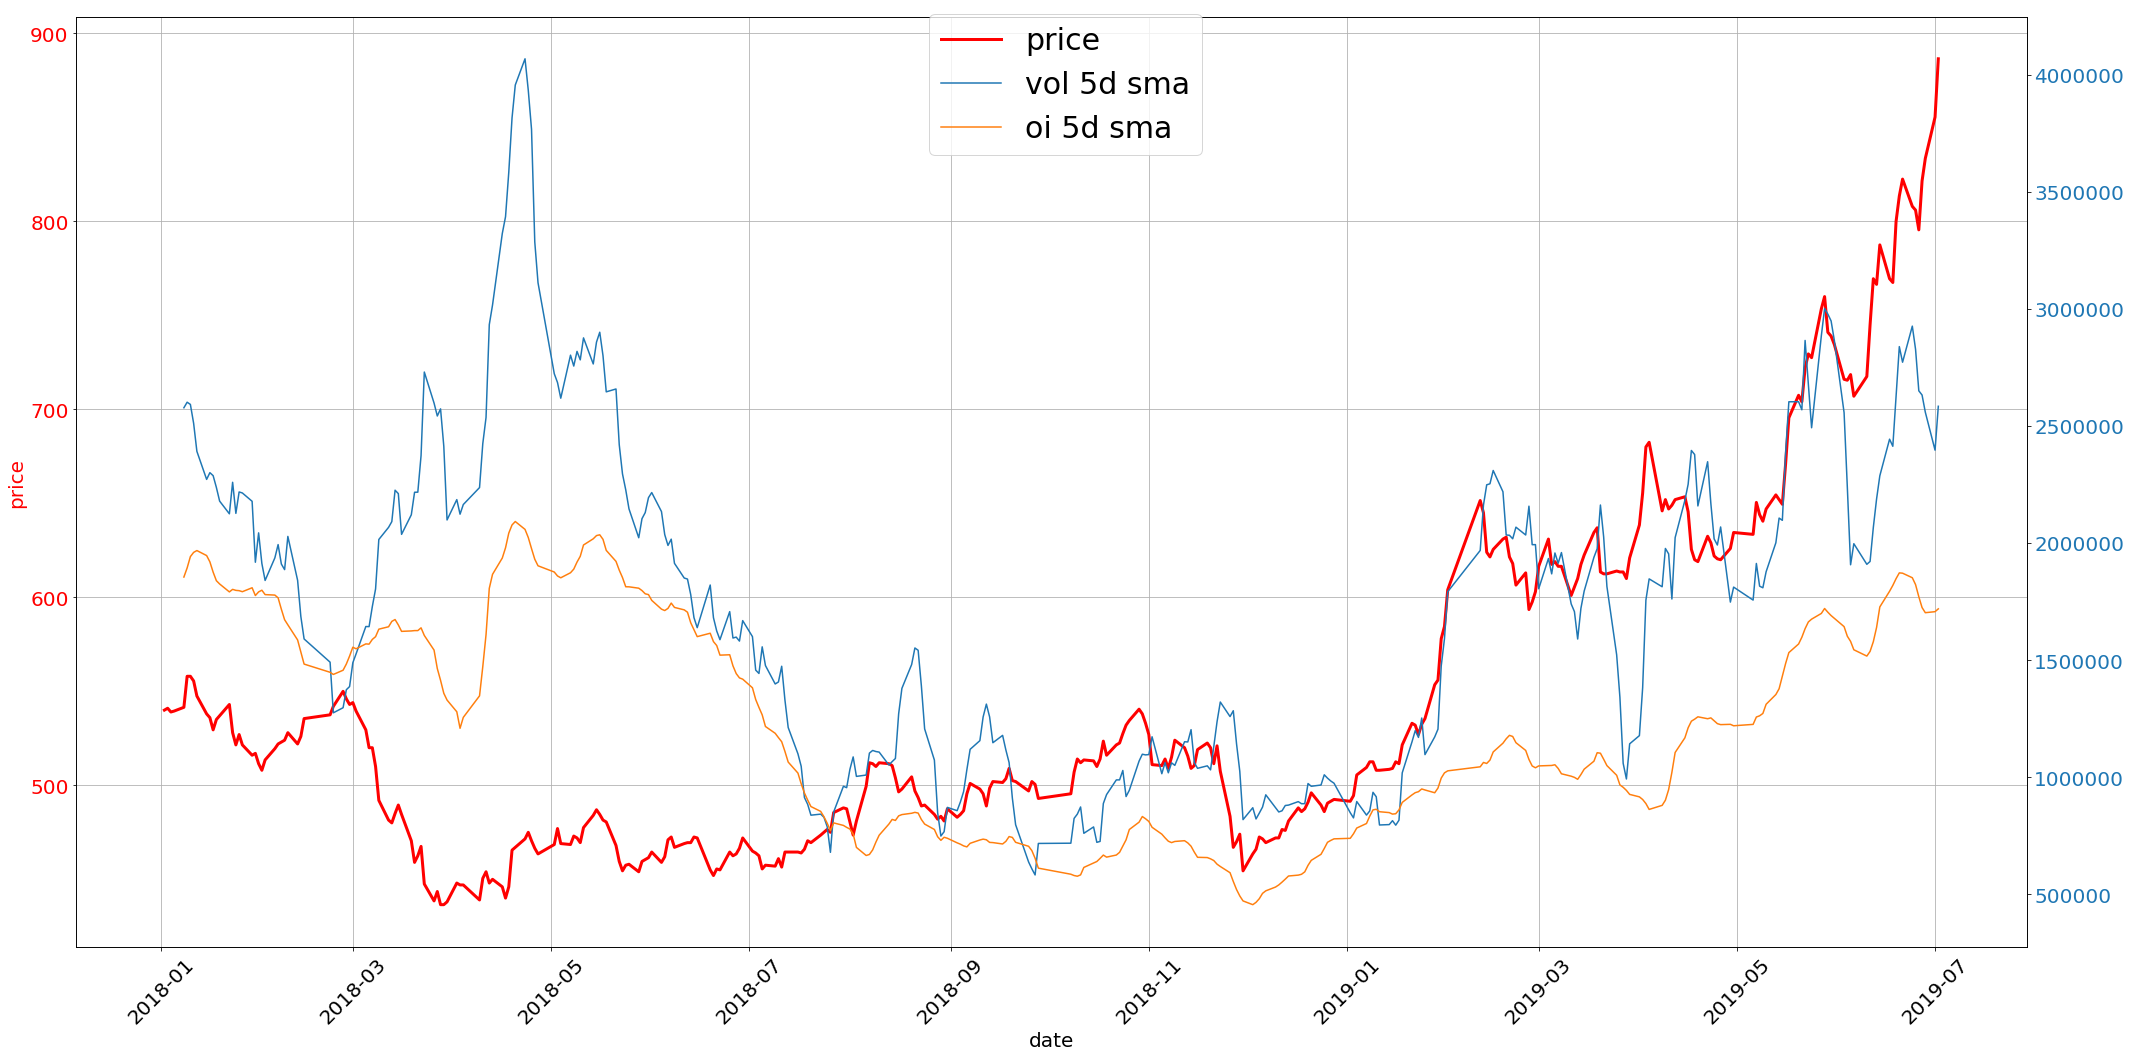

In [254]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)

color="red"
ax1.set_xlabel('date')
ax1.set_ylabel('price', color=color)
ax1.plot(df["date"], df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color="tab:blue"
ax2.plot(df["date"], df["vol sma"], color=color, label="vol 5d sma")
ax2.plot(df["date"], df["oi sma"], color="tab:orange", label="oi 5d sma")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

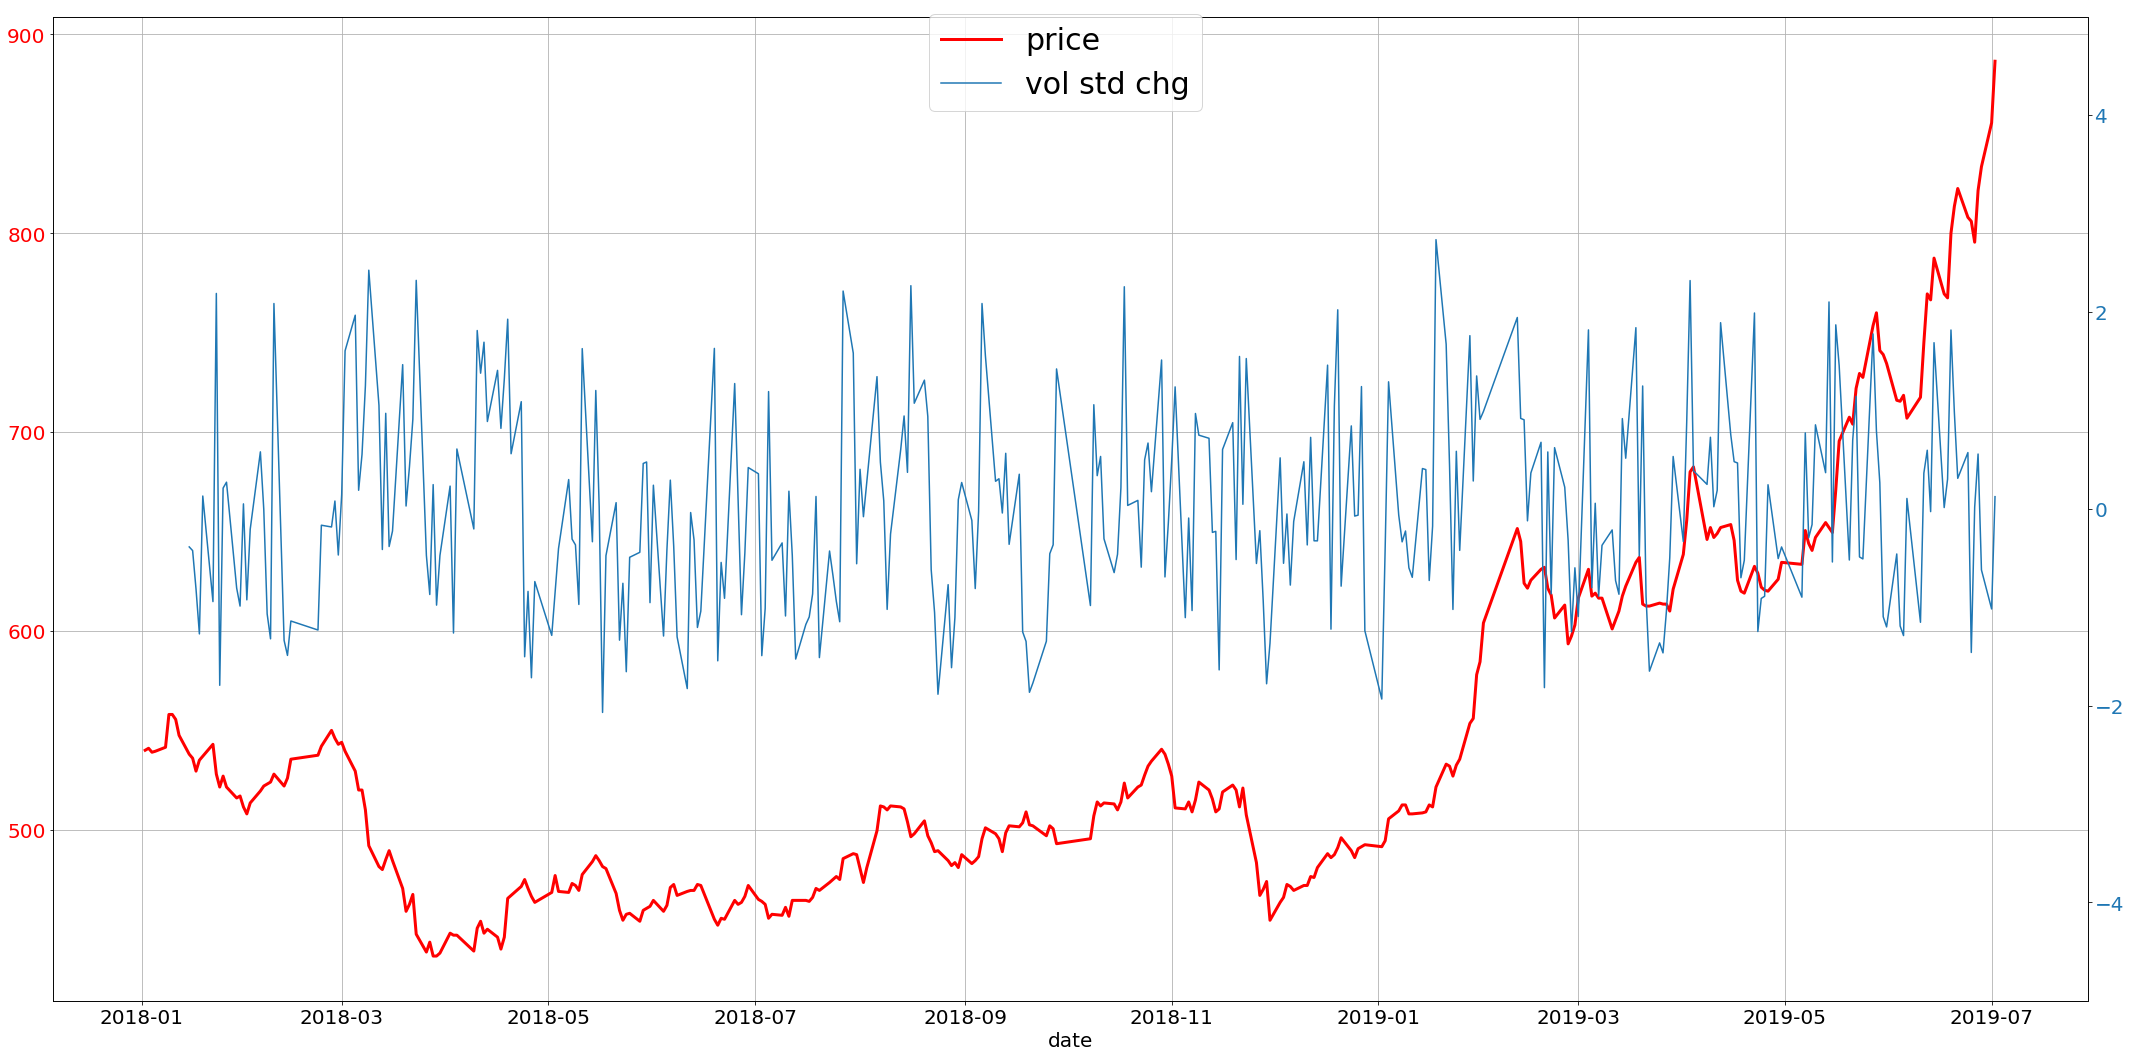

In [261]:
fig, ax1 = plt.subplots()

color="red"
ax1.set_xlabel('date')
ax1.plot(df["date"], df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color="tab:blue"
ax2.plot(df["date"], df["vol std chg"], color=color, label="vol std chg")
axes = plt.gca()
axes.set_ylim([-5,5])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

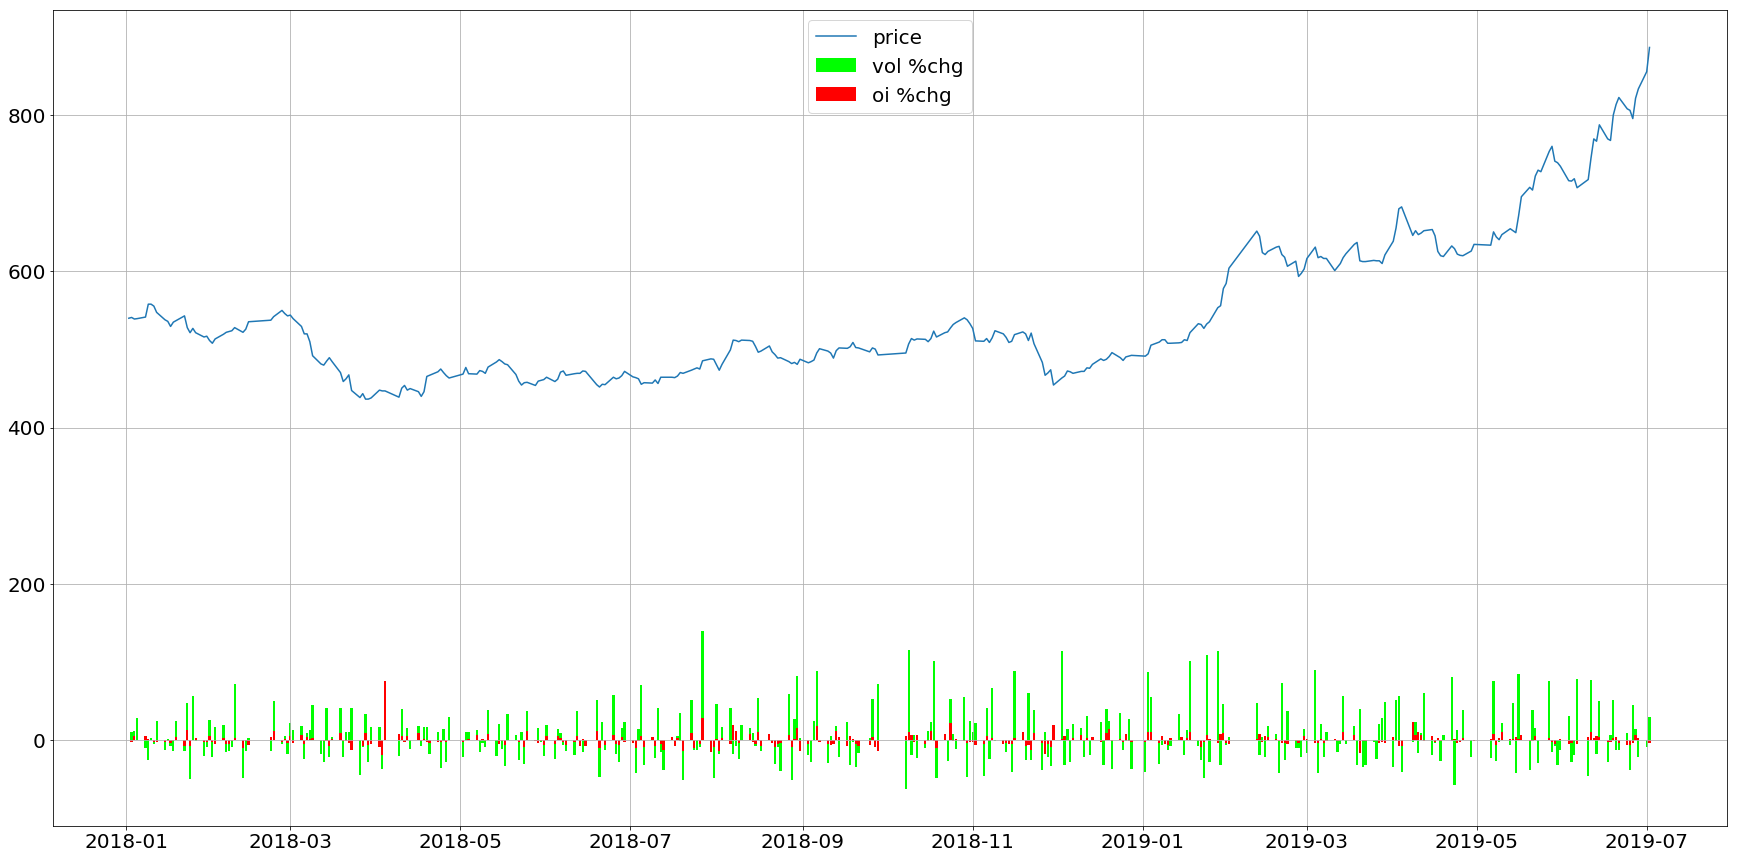

In [264]:
plt.plot(df["date"], df["price"], label="price")
plt.bar(df["date"], df["vol %chg"], color="lime", label="vol %chg")
plt.bar(df["date"], df["oi %chg"], color="red", label="oi %chg")
plt.grid(True)
plt.legend(loc=9, prop={'size': 20})
plt.show()

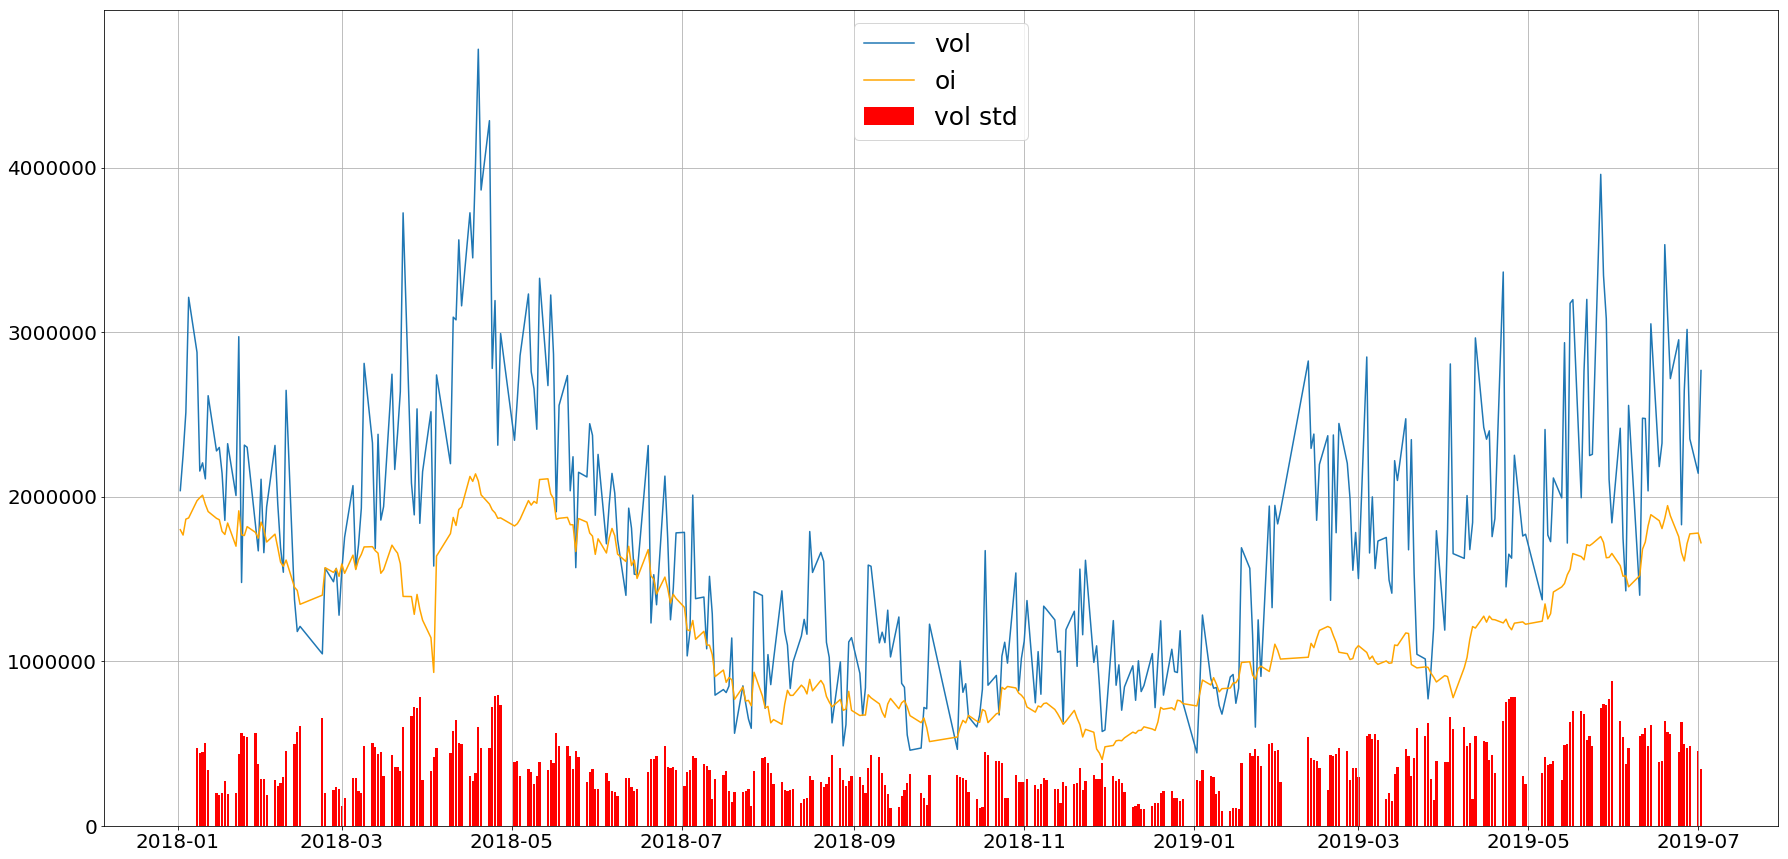

In [265]:
plt.plot(df["date"], df["vol"], label="vol")
plt.plot(df["date"], df["oi"], color="orange", label="oi")
plt.bar(df["date"], df["vol std"], color="red", label="vol std")
plt.grid(True)
plt.legend(loc=9, prop={'size': 25})
plt.show()

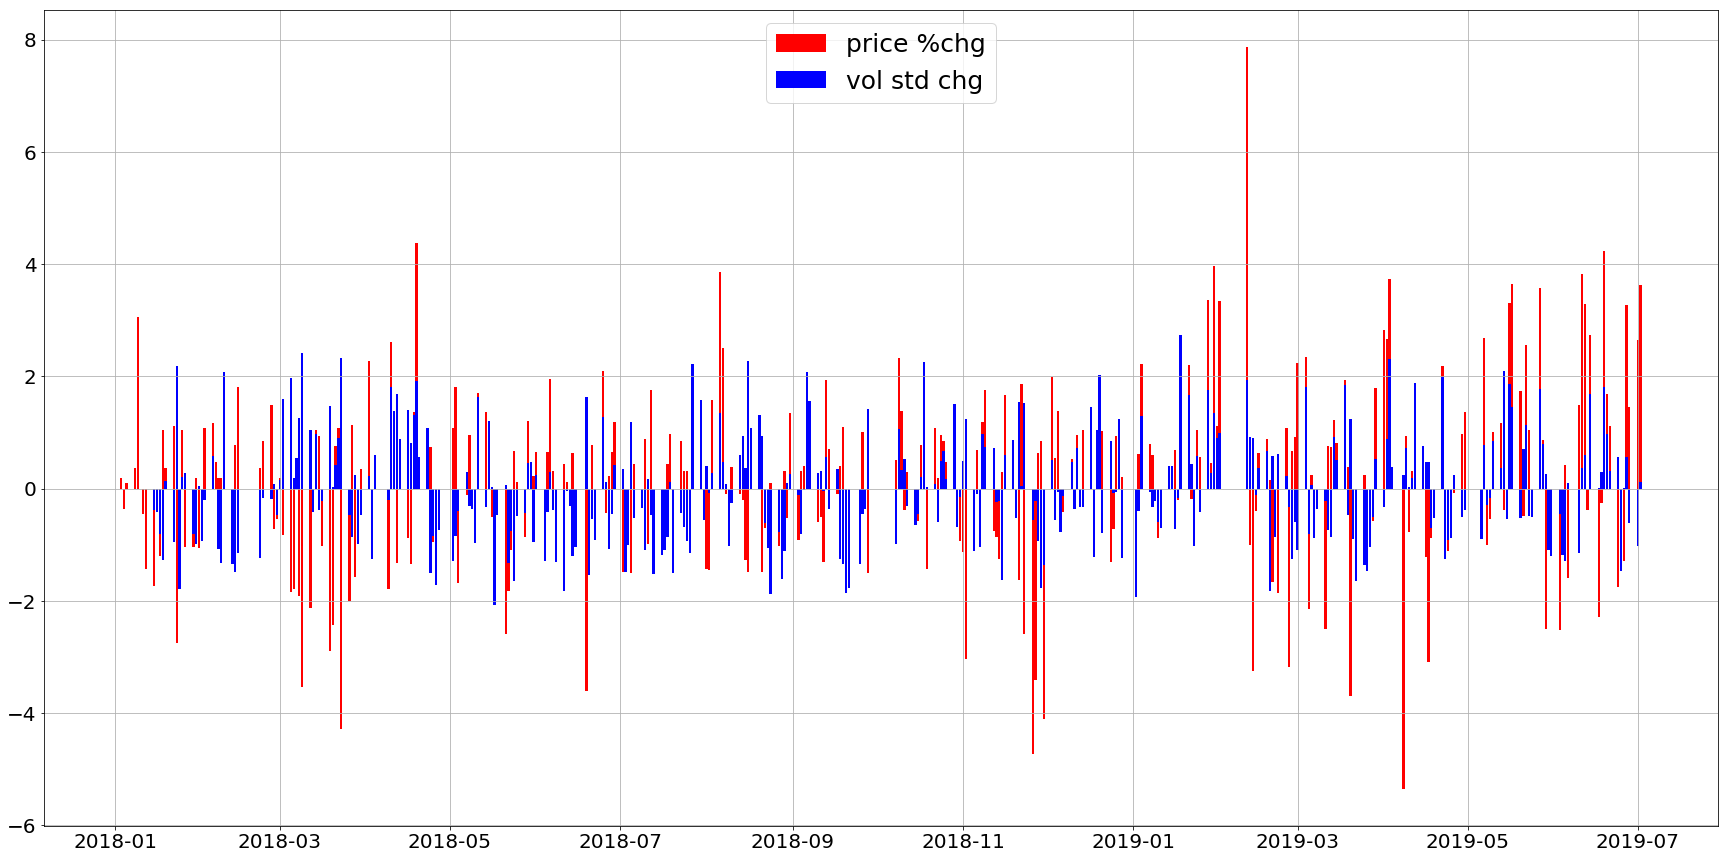

In [266]:
plt.bar(df["date"], df["price %chg"], color="red",  label="price %chg")
#plt.plot(df["date"], df["vol %chg"],  label="vol %chg")
#plt.plot(df["date"], df["oi %chg"], color="lime",  label="oi %chg")
plt.bar(df["date"], df["vol std chg"], color="blue",  label="vol std chg")
plt.grid(True)
plt.legend(loc=9, prop={'size': 25})
plt.show()